In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
#import plotly as py
#import plotly.tools as tls
#import cufflinks as cf
#cf.go_offline()

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,price1
0,16695,3.9,Women,Flipkart,999,38.0,7.0,17.0,9.0,6.0,3,3,0,698
1,5120,3.8,Men,Flipkart,1999,531.0,69.0,264.0,92.0,73.0,29,73,1,999
2,18391,4.4,Women,Flipkart,4999,17.0,4.0,11.0,3.0,2.0,1,0,1,2749
3,495,4.2,Men,Flipkart,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,518
4,16408,3.9,Men,Flipkart,2299,77.0,3.0,35.0,21.0,7.0,7,7,1,1379


In [3]:
dummis1 = pd.get_dummies(df_train['maincateg'],prefix='maincateg')



df_train  = pd.concat([df_train,dummis1.iloc[:,1:]],axis=1)

dummis2 = pd.get_dummies(df_train['platform'],prefix='platform')
df_train  = pd.concat([df_train,dummis2.iloc[:,1:]],axis=1)

df_train.drop('platform',axis=1,inplace=True)
df_train.drop('maincateg',axis=1,inplace=True)
#df_train.dropna(inplace=True)

In [4]:
#df_train.drop('id',axis=1,inplace=True)
df_train.isnull().sum()

id                     0
Rating                 0
actprice1              0
norating1            678
noreviews1           578
star_5f              588
star_4f              539
star_3f              231
star_2f                0
star_1f                0
fulfilled1             0
price1                 0
maincateg_Women        0
platform_Flipkart      0
dtype: int64

In [5]:
df_train['norating1'] = df_train['norating1'].fillna(df_train['norating1'].mean())
df_train['noreviews1'] = df_train['noreviews1'].fillna(df_train['noreviews1'].mean())
df_train['star_5f'] = df_train['star_5f'].fillna(df_train['star_5f'].mean())
df_train['star_4f'] = df_train['star_4f'].fillna(df_train['star_4f'].mean())
df_train['star_3f'] = df_train['star_3f'].fillna(df_train['star_3f'].mean())
df_train['star_2f'] = df_train['star_2f'].fillna(df_train['star_2f'].mean())
df_train['star_1f'] = df_train['star_1f'].fillna(df_train['star_1f'].mean())


In [6]:
X_train = df_train[['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f','star_3f', 'star_2f', 'star_1f', 'fulfilled1',
       'maincateg_Women', 'platform_Flipkart']]
y_train = df_train['price1']

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
X_scaled = sc.fit_transform(X_train)

In [9]:
from sklearn.tree import DecisionTreeRegressor
lm = DecisionTreeRegressor(random_state = 0)
lm.fit(X_scaled,y_train)

DecisionTreeRegressor(random_state=0)

In [10]:
lm.score(X_scaled,y_train)

0.9982752577046142

# TESTING

In [12]:
df_test = pd.read_csv('test.csv')

In [13]:
dummis3 = pd.get_dummies(df_test['maincateg'],prefix='maincateg')



df_test  = pd.concat([df_test,dummis3.iloc[:,1:]],axis=1)

dummis4 = pd.get_dummies(df_test['platform'],prefix='platform')
df_test  = pd.concat([df_test,dummis4.iloc[:,1:]],axis=1)

df_test.drop('platform',axis=1,inplace=True)
df_test.drop('maincateg',axis=1,inplace=True)
#df_test.dropna(inplace=True)

In [14]:
df_test['norating1'] = df_test['norating1'].fillna(df_test['norating1'].mean())
df_test['noreviews1'] = df_test['noreviews1'].fillna(df_test['noreviews1'].mean())
df_test['star_5f'] = df_test['star_5f'].fillna(df_test['star_5f'].mean())
df_test['star_4f'] = df_test['star_4f'].fillna(df_test['star_4f'].mean())
df_test['star_3f'] = df_test['star_3f'].fillna(df_test['star_3f'].mean())
df_test['star_2f'] = df_test['star_2f'].fillna(df_test['star_2f'].mean())
df_test['star_1f'] = df_test['star_1f'].fillna(df_test['star_1f'].mean())
df_test['Rating'] = df_test['Rating'].fillna(df_test['Rating'].mean())

In [15]:
len(df_test)

5244

In [16]:
df_id = df_test['id']

In [17]:
len(df_id)

5244

In [18]:
df_test.id

0        2242
1       20532
2       10648
3       20677
4       12593
        ...  
5239    14033
5240      297
5241    18733
5242     6162
5243    13574
Name: id, Length: 5244, dtype: int64

In [19]:
df_test.drop('id',axis=1,inplace=True)

In [20]:
df_test.isnull().sum()


title                0
Rating               0
actprice1            0
norating1            0
noreviews1           0
star_5f              0
star_4f              0
star_3f              0
star_2f              0
star_1f              0
fulfilled1           0
maincateg_Women      0
platform_Flipkart    0
dtype: int64

In [21]:
df_train.columns

Index(['id', 'Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f',
       'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1', 'price1',
       'maincateg_Women', 'platform_Flipkart'],
      dtype='object')

In [22]:
X_test = df_test[['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f',
       'star_3f', 'star_2f', 'star_1f', 'fulfilled1',
       'maincateg_Women', 'platform_Flipkart']]

In [23]:
x_test_scale = sc.fit_transform(X_test)

In [24]:
pre =lm.predict(x_test_scale)

In [25]:
X_scaled.shape

(15730, 12)

In [26]:
x_test_scale.shape

(5244, 12)

In [27]:
pre.max()

4814.0

In [28]:
pre_id = pd.DataFrame(np.round(pre,decimals=3),columns=['price1'])

In [29]:
pre_id['id'] = df_id[::]

In [30]:
pre_id

,price1,id
0,294.0,2242
1,331.0,20532
2,331.0,10648
3,949.0,20677
4,395.4,12593
...,...,...
5239,225.0,14033
5240,699.0,297
5241,549.0,18733
5242,189.0,6162


<AxesSubplot:xlabel='price1', ylabel='Count'>

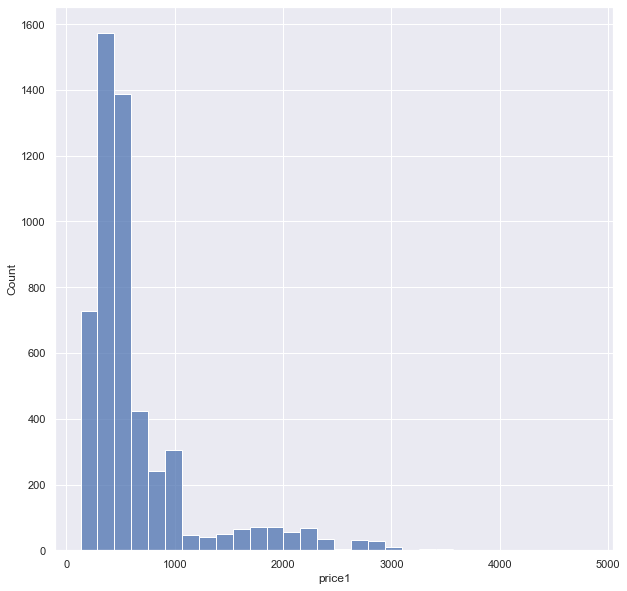

In [31]:
plt.figure(figsize=(10,10),facecolor='white')
sns.set_theme(style='darkgrid')
sns.histplot(pre_id['price1'],bins=30)

<AxesSubplot:xlabel='id', ylabel='Count'>

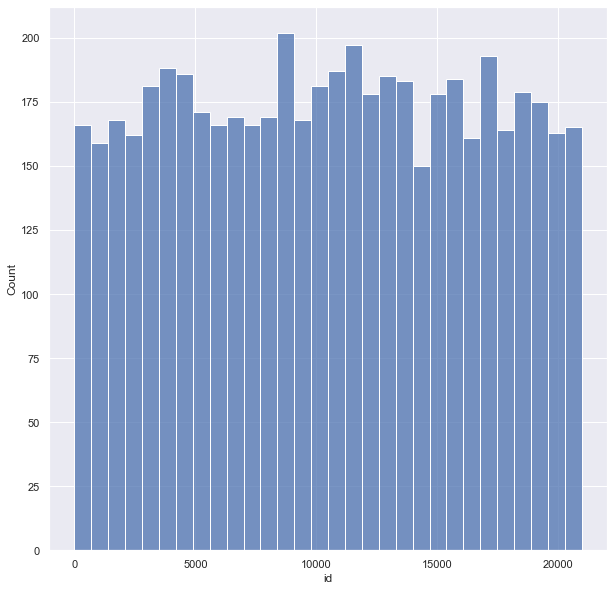

In [32]:
plt.figure(figsize=(10,10),facecolor='white')
sns.set_theme(style='darkgrid')
sns.histplot(pre_id['id'],bins=30)

In [34]:
pre_id.to_csv(r'C:\Users\HP\SUMMER ANALYTICS\HACKATHON\sa2022\new\decisiontree_hackathon.csv',index=False)